In [3]:
!pip install ipython-sql
!pip install ipython-sql prettytable

In [5]:
%load_ext sql

In [42]:
### TASK 1: Visualize the relationship between Flight Number and Launch Site

In [16]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
df = pd.read_csv(url)
df.head()  # Shows the first 5 rows


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [24]:
### TASK 2: Visualize the relationship between Payload Mass and Launch Site

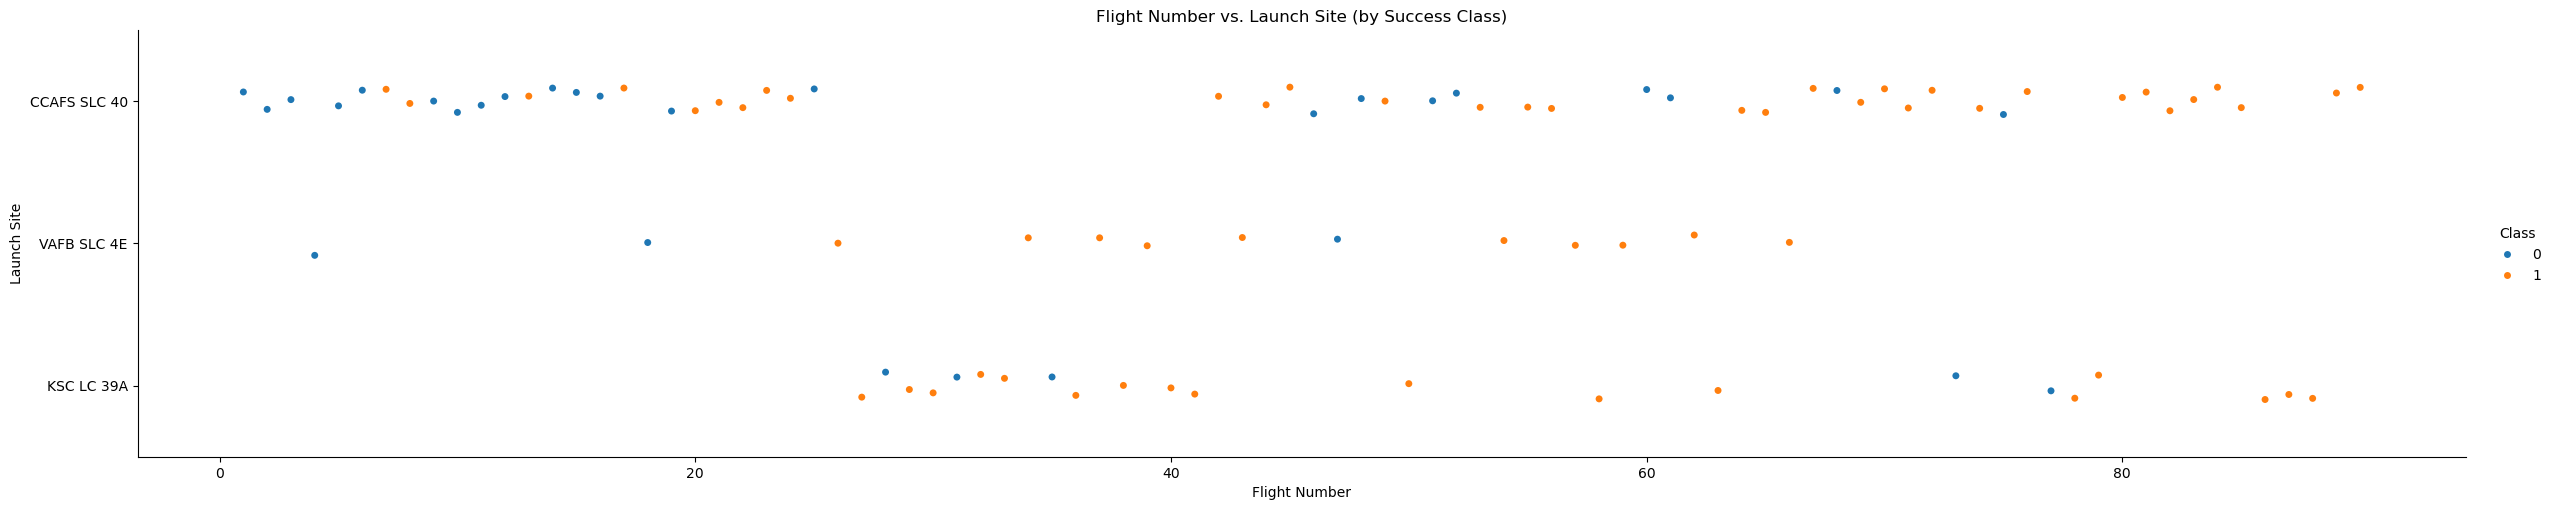

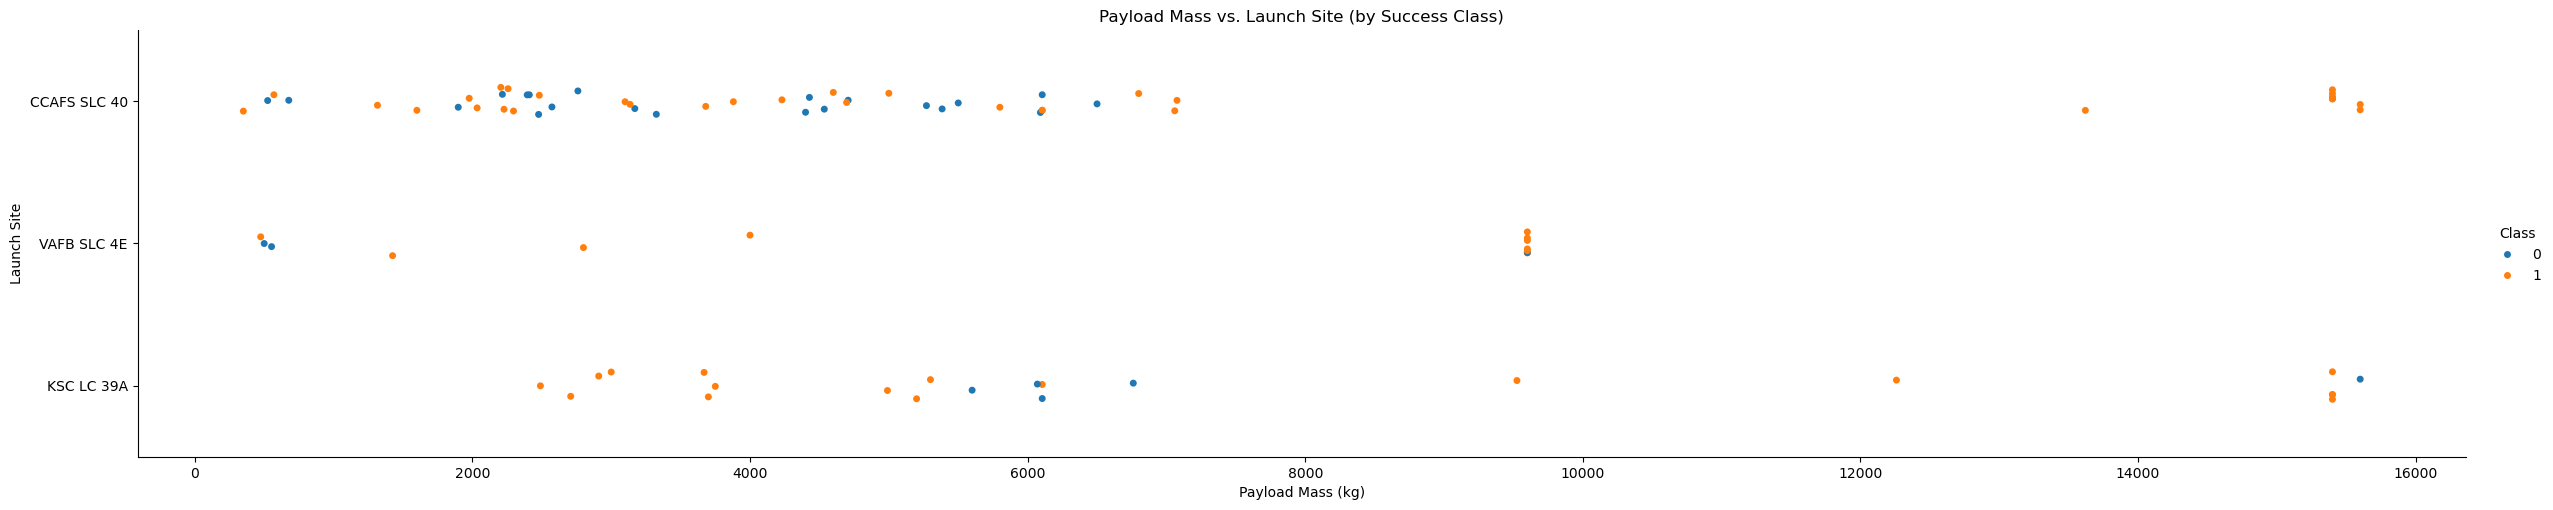

In [34]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")
plt.title("Flight Number vs. Launch Site (by Success Class)")
plt.show()

sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=5)
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.title("Payload Mass vs. Launch Site (by Success Class)")
plt.show()

In [26]:
### TASK  3: Visualize the relationship between success rate of each orbit type

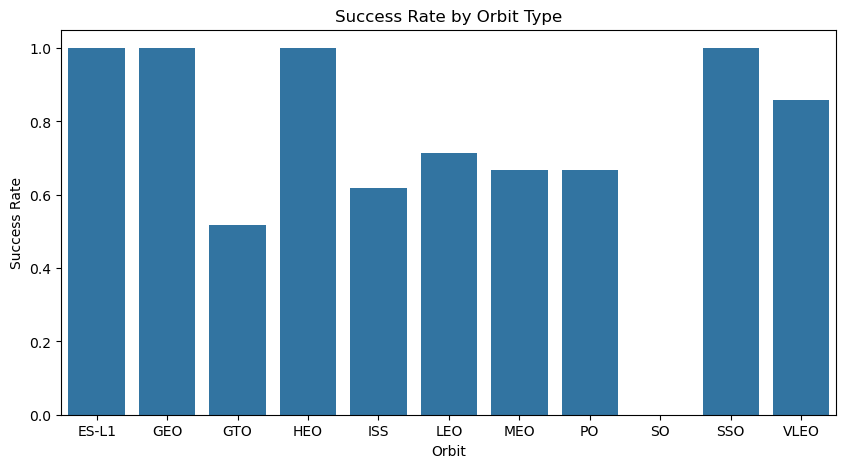

In [32]:
success_by_orbit = df.groupby('Orbit')['Class'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='Orbit', y='Class', data=success_by_orbit)
plt.ylabel("Success Rate")
plt.title("Success Rate by Orbit Type")
plt.show()


In [ ]:
### TASK  4: Visualize the relationship between FlightNumber and Orbit type


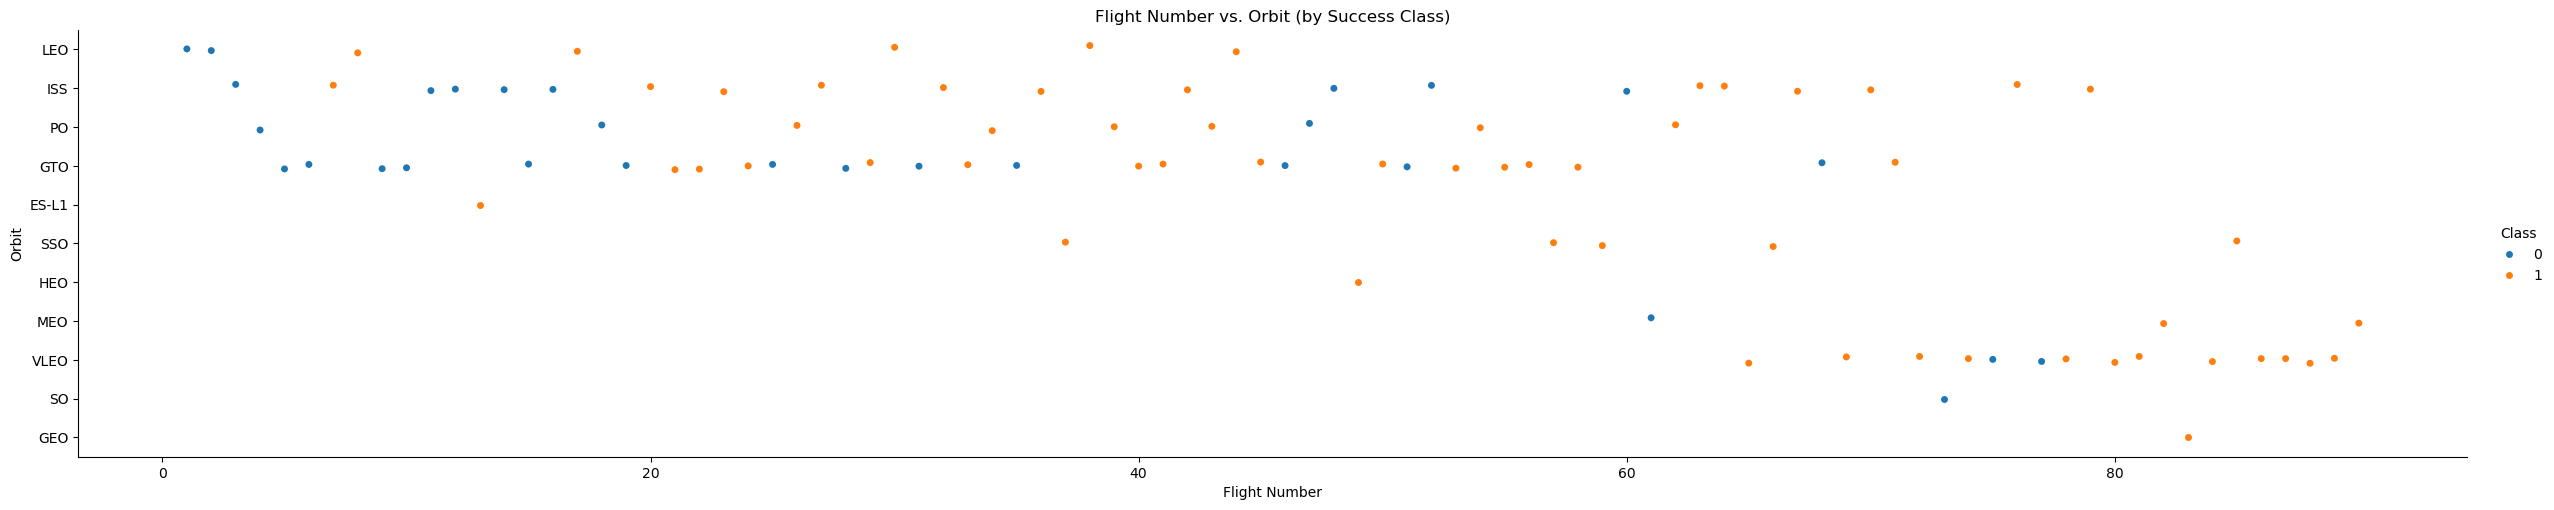

In [36]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number")
plt.ylabel("Orbit")
plt.title("Flight Number vs. Orbit (by Success Class)")
plt.show()

In [28]:
### TASK  5: Visualize the relationship between Payload Mass and Orbit type


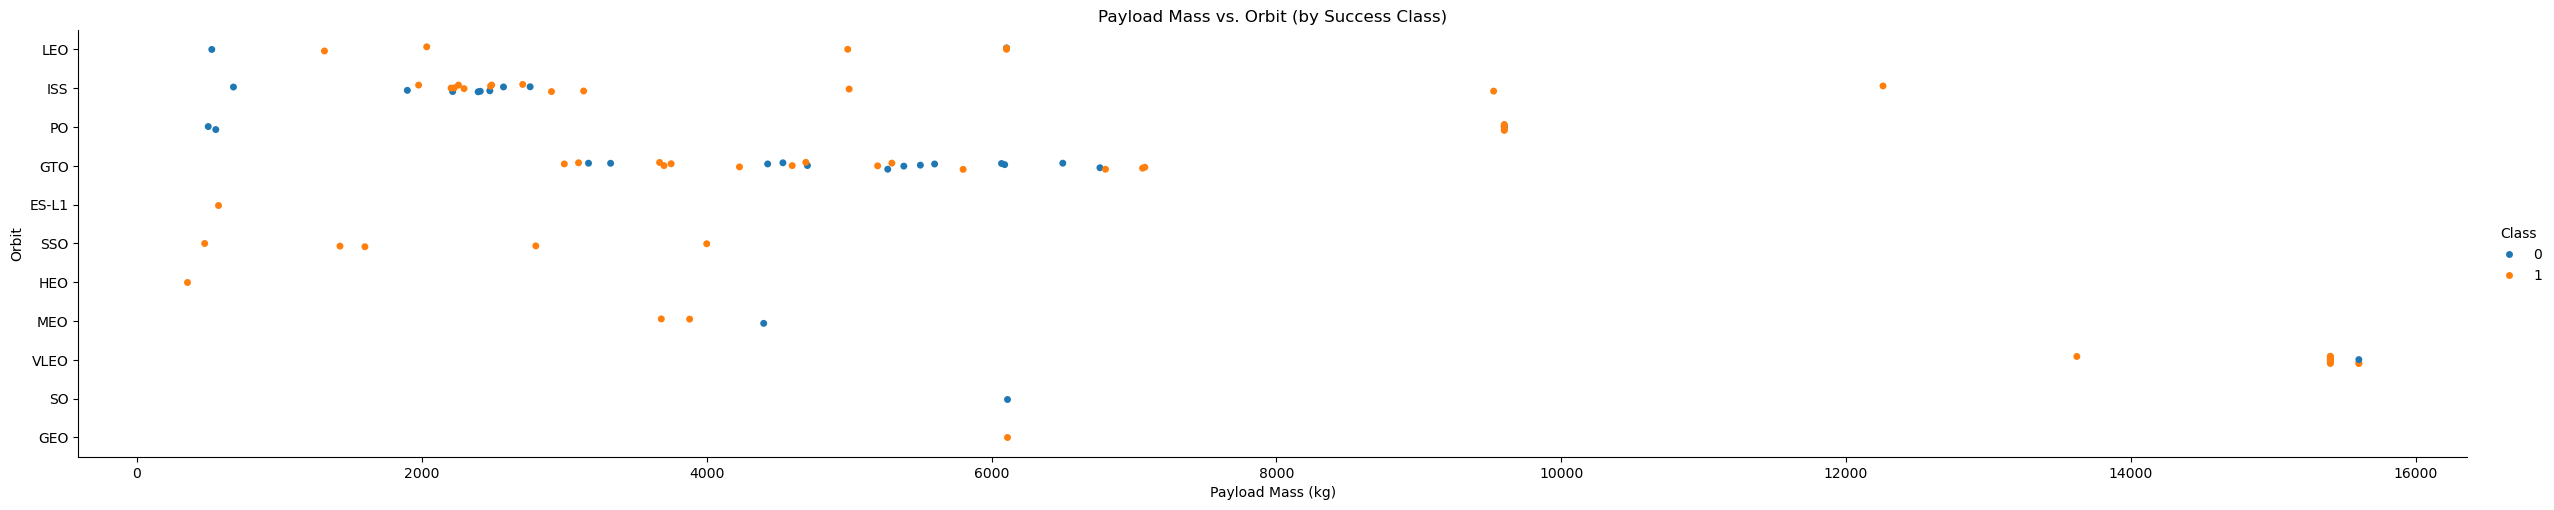

In [38]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect=5)
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit")
plt.title("Payload Mass vs. Orbit (by Success Class)")
plt.show()

In [30]:
### TASK  6: Visualize the launch success yearly trend


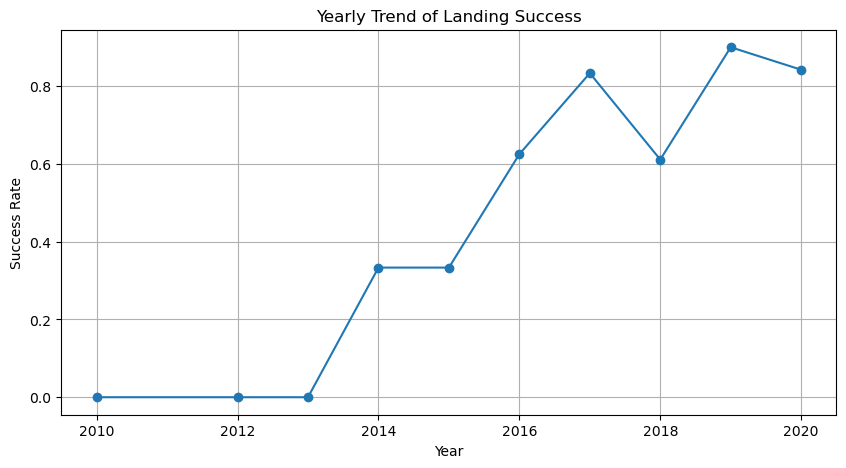

In [40]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
success_by_year = df.groupby('Year')['Class'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(success_by_year['Year'], success_by_year['Class'], marker='o')
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.title("Yearly Trend of Landing Success")
plt.grid(True)
plt.show()

In [44]:
## Features Engineering

In [52]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins',
               'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()


,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [46]:
### TASK  7: Create dummy variables to categorical columns

In [54]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
### TASK  8: Cast all numeric columns to `float64`

In [56]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)